In [69]:
from sklearn.preprocessing import PolynomialFeatures # создание полиномиальных признаков
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load

In [70]:
# Полиномиальная регрессия решает две задачи
# Нелинейная взаимосвязь признака и целевой переменной
# Взаимодействие признаков

In [71]:
df = pd.read_csv('Advertising.csv')
X = df.drop('sales', axis=1)
y = df['sales']

In [105]:
polynomial_converver = PolynomialFeatures(degree=2, include_bias=False) # include_bias=False - модель без intercept, degree - макс.степень признака

In [73]:
# Всё это делается до обучения модели

In [106]:
polynomial_converver.fit(X) # анализ признаков
polynomial_features = polynomial_converver.transform(X)

In [107]:
df.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
sales         22.1
Name: 0, dtype: float64

In [108]:
polynomial_features[0] # видно, что первая три значения соотвествует первой строке из df
# остальное - произведение признаков и их квадраты.
# расположение не по порядку, но это не столь важно

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [77]:
polynomial_converver.fit_transform(X) # создание признаков за одну операцию

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [78]:
polynomial_features.shape # размер 9 - т.к. признаков 9

(200, 9)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)

In [80]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [81]:
test_prediction = model.predict(X_test)
model.coef_ # 9 коэффициентов т.к. полиномиальные признаки второй степени
# чтобы понять, что к чему относится, надо сравнить polynomial_features и X.iloc[0]

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [82]:
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = MSE**(1/2)

In [83]:
MAE 

0.48967980448035886

In [84]:
RMSE

0.6646431757269

In [85]:
# значения метрик было сильно больше, когда была линейная функция => полином годится лучше
# но надо проверять, что тестовые наборы данных были одинаковыми по объему

In [86]:
# Создать различные степени полинома
# Разбить данные на тестовый и обучающий набор данных
# Обучить модель
# Сохранить метрики RMSE

In [87]:
train_rmse_error = []
test_rmse_error = []

for i in range(1, 10):
    polynomial_converver = PolynomialFeatures(degree=i, include_bias=False)
    polynomial_features = polynomial_converver.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)

    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    train_rmse_error.append(mean_squared_error(y_train, train_pred))
    test_rmse_error.append(mean_squared_error(y_test, test_pred))

In [88]:
train_rmse_error

[3.008816776157995,
 0.34569391424440005,
 0.188299094477778,
 0.12369877671204814,
 0.06296801909174883,
 0.04390587334758637,
 0.048606400069932554,
 0.07371265684032878,
 0.26337850314543637]

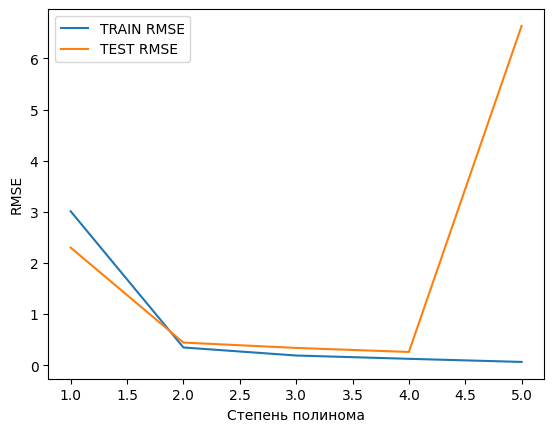

In [89]:
plt.plot(range(1,6), train_rmse_error[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_error[:5], label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Степень полинома')
plt.legend();

In [90]:
# оптимальная степень полинома примерно 

In [91]:
# Внедрение модели
final_polynomial_converver = PolynomialFeatures(degree=3, include_bias=False)
final_converted_X = final_polynomial_converver.fit_transform(X) # все данные

In [111]:
final_model = LinearRegression()
final_model.fit(final_converted_X, y)

LinearRegression()

In [93]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [94]:
dump(final_polynomial_converver, 'final_converter.joblib')

['final_converter.joblib']

In [95]:
loaded_converter = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [113]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [127]:
campaign = pd.DataFrame(np.array([[149, 22, 12]]),columns=['TV', 'radio', 'newspaper'])
campaign

,TV,radio,newspaper
0,149,22,12


In [128]:
data_transformed = loaded_converter.transform(campaign)

In [ ]:
loaded_model.predict(data_transformed) # предсказание по загруженной модели

array([14.64501014])